In [3]:
import pandas as pd


In [58]:
file_path_kammi = r'C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\BW3\Finale\Supergacsv.csv'
file_path_superga = r'C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\BW3\Finale\Kammicsv.csv'


db_superga = pd.read_csv(file_path_superga, delimiter=',')
db_kammi = pd.read_csv(file_path_kammi,delimiter=',')

In [60]:
db_superga = pd.DataFrame(db_superga)
db_kammi = pd.DataFrame(db_kammi)

print(db_kammi)


      4121-FANRBRW  PALMS-BLACK  35    14  35.1  infradito
0     4121-FANRBRW  PALMS-BLACK  36  14.0    35  infradito
1     4121-FANRBRW  PALMS-BLACK  37  14.0    35  infradito
2     4121-FANRBRW  PALMS-BLACK  38  14.0    35  infradito
3     4121-FANRBRW  PALMS-BLACK  39  14.0    35  infradito
4     4121-FANRBRW  PALMS-BLACK  40  14.0    35  infradito
...            ...          ...  ..   ...   ...        ...
4048    2790 NAPPA        WHITE  38   NaN   105      zeppe
4049    2790 NAPPA        WHITE  39   NaN   105      zeppe
4050    2790 NAPPA        WHITE  40   NaN   105      zeppe
4051    2790 NAPPA        WHITE  41   NaN   105      zeppe
4052    2790 NAPPA        WHITE  42   NaN   105      zeppe

[4053 rows x 6 columns]


In [62]:
db_superga.columns = ['NOME', 'COLORE', 'TAGLIA', 'PREZZO_SCONTATO', 'PREZZO', 'CATEGORIA']
db_kammi.columns = ['NOME', 'COLORE', 'TAGLIA', 'PREZZO_SCONTATO', 'PREZZO', 'CATEGORIA']

In [64]:
print(db_superga.head())

           NOME  COLORE  TAGLIA  PREZZO_SCONTATO  PREZZO CATEGORIA
0  Ciabatta 800  d6d0da      38              NaN    44.0  ciabatta
1  Ciabatta 800  d6d0da      39              NaN    44.0  ciabatta
2  Ciabatta 800  eec4ab      36              NaN    44.0  ciabatta
3  Ciabatta 800  eec4ab      38              NaN    44.0  ciabatta
4  Ciabatta 800  eec4ab      39              NaN    44.0  ciabatta


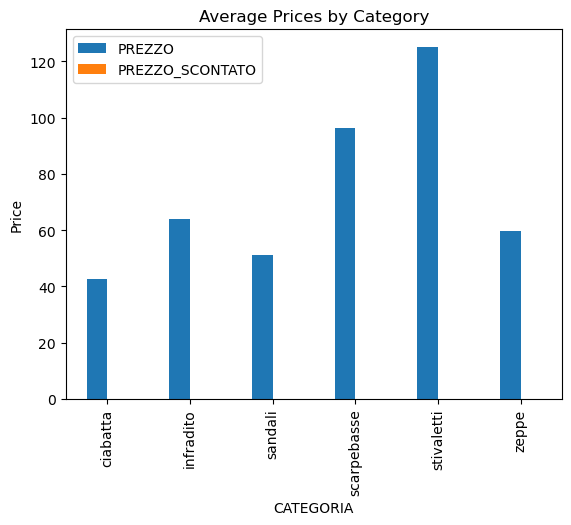

In [66]:
import matplotlib.pyplot as plt

# Example: Bar Chart for Price Comparison by Category
db_superga.groupby('CATEGORIA')[['PREZZO', 'PREZZO_SCONTATO']].mean().plot(kind='bar')
plt.title('Average Prices by Category')
plt.ylabel('Price')
plt.show()

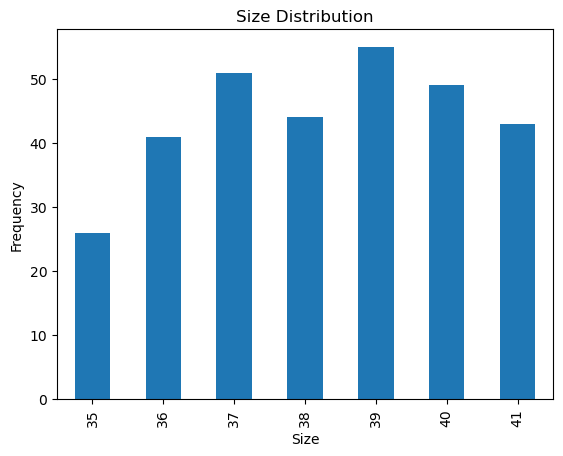

In [68]:
# Example: Histogram of Sizes
db_superga['TAGLIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

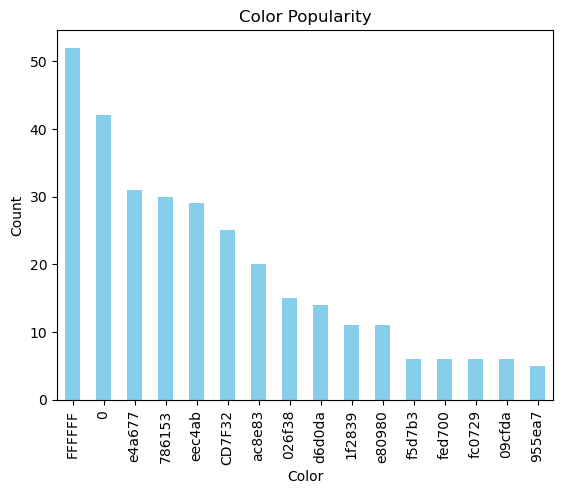

In [70]:
# Example: Bar Chart for Colors
db_superga['COLORE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Color Popularity')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

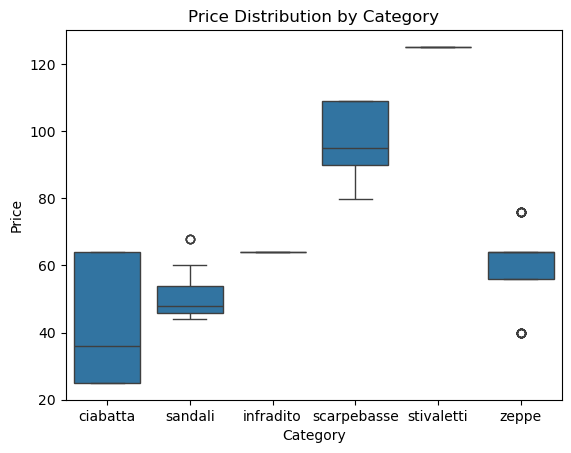

In [72]:
import seaborn as sns

# Example: Box Plot for Price by Category
sns.boxplot(data=db_superga, x='CATEGORIA', y='PREZZO')
plt.title('Price Distribution by Category')
plt.ylabel('Price')
plt.xlabel('Category')
plt.show()

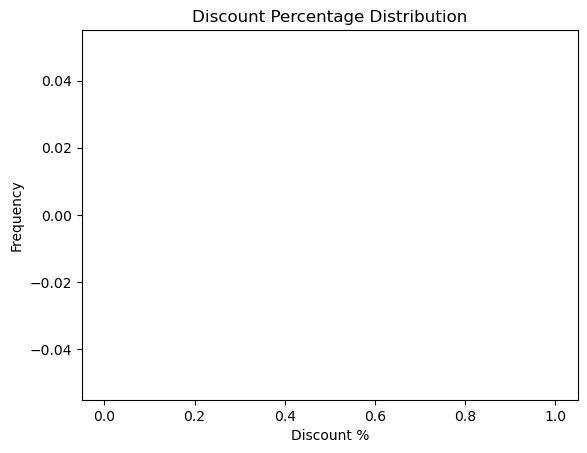

In [74]:
# Calculate Discount Percentage
db_superga['DISCOUNT_PERCENT'] = ((db_superga['PREZZO'] - db_superga['PREZZO_SCONTATO']) / db_superga['PREZZO']) * 100

# Example: Histogram for Discounts
db_superga['DISCOUNT_PERCENT'].plot(kind='hist', bins=10, color='green', alpha=0.7)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.show()

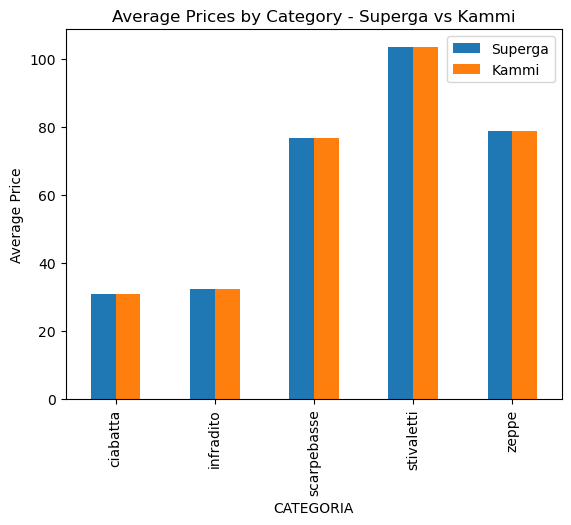

In [76]:
# Example: Side-by-Side Bar Chart for Average Prices by Category
superga_avg = db_kammi.groupby('CATEGORIA')['PREZZO'].mean()
kammi_avg = db_kammi.groupby('CATEGORIA')['PREZZO'].mean()

comparison = pd.DataFrame({'Superga': superga_avg, 'Kammi': kammi_avg})
comparison.plot(kind='bar')
plt.title('Average Prices by Category - Superga vs Kammi')
plt.ylabel('Average Price')
plt.show()

In [78]:
# ANALISI SCARPE BASSE 

supergacsv_basse = db_superga[db_superga['CATEGORIA'].str.contains('scarpebasse', case=False, na=False)]
kammicsv_basse = kammicsv[kammicsv['CATEGORIA'].str.contains('scarpebasse', case=False, na=False)]

# colonna brand
supergacsv_basse['Brand'] = 'Supergacsv'
kammicsv_basse['Brand'] = 'Kammicsv'


scarpe_basse = pd.concat([supergacsv_basse, kammicsv_basse])
print(scarpe_basse)

# Raggruppare per brand e calcolare metriche di interesse
aggregati = scarpe_basse.groupby('Brand').agg({'NOME': 'nunique','COLORE': 'nunique',
                                               'TAGLIA': 'count',
                                                'PREZZO': ['mean', 'min', 'max']}).reset_index()



NameError: name 'kammicsv' is not defined

In [80]:
# Riorganizzare i dati per una migliore leggibilità
aggregati.columns = ['Brand', 'Modelli Unici', 'Colori Unici', 'Numero di Taglie', 'Prezzo Medio', 'Prezzo Min', 'Prezzo Max']

# Visualizzare i risultati in un grafico barplot per ogni metrica
import matplotlib.pyplot as plt
import seaborn as sns

# Numero di modelli unici
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Modelli Unici')
plt.title('Numero di Modelli Unici per Brand')
plt.ylabel('Numero di Modelli')
plt.show()

# Numero di colori unici
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Colori Unici')
plt.title('Numero di Colori Unici per Brand')
plt.ylabel('Numero di Colori')
plt.show()

# Prezzo medio per brand
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Prezzo Medio')
plt.title('Prezzo Medio delle Scarpe Basse per Brand')
plt.ylabel('Prezzo Medio (€)')
plt.show()

# Numero totale di taglie
plt.figure(figsize=(8, 6))
sns.barplot(data=aggregati, x='Brand', y='Numero di Taglie')
plt.title('Numero Totale di Taglie per Brand')
plt.ylabel('Numero di Taglie')
plt.show()

# Mostrare il riepilogo in forma tabellare
import ace_tools as tools; tools.display_dataframe_to_user(name="Confronto Aggregato Scarpe Basse", dataframe=aggregati)


NameError: name 'aggregati' is not defined

In [ ]:
# Assicurarsi che le colonne numeriche siano coerenti
scarpe_basse['PREZZO'] = pd.to_numeric(scarpe_basse['PREZZO'], errors='coerce')
scarpe_basse['TAGLIA'] = pd.to_numeric(scarpe_basse['TAGLIA'], errors='coerce')